In [1]:
import sys, os, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pickle


In [2]:
case = 'run_U_'

# print config
f = open('Mooring/'+case+'lines.txt','r')
for line in f:
    print(line.strip())

# load data
D = []
u1min, u1max = 10., 0.
for file in sorted(glob.glob('Mooring/'+case+'*.p')):
    f = open(file,'rb')
    u0, u1, x, y, z = pickle.load(f)
    D.append({'u0': u0, 'u1': u1, 'x': x, 'y': y, 'z': z})
    u1min = np.min([u1min, u1])
    u1max = np.max([u1max, u1])


MoorDyn input file of the cognac surface sources
----------------------- LINE TYPES ------------------------------------------
Name   Diam   MassDen     EA        BA/-zeta Can  Cat  Cdn  Cdt
(-)     (m)    (kg/m)     (N)       (N-s/-)  (-)  (-)  (-)  (-)
main   0.006    .150    384.243E6     -0.8    1.0  0.0  1.6  0.1
---------------------- CONNECTION PROPERTIES --------------------------------
Node Type       X       Y       Z     M     V    FX   FY   FZ   CdA  Ca
(-)  (-)       (m)     (m)     (m)   (kg) (m^3) (kN) (kN) (kN) (m^2) (-)
1    connect    0      0.0    -100.0  5   .001   0    0    0   0.04   0
2    vessel     0      0.0      0.0   0     0    0    0    0     1.   0
---------------------- LINE PROPERTIES --------------------------------------
Line LineType UnstrLen NumSegs NodeAnch NodeFair Flags/Outputs
(-)    (-)      (m)      (-)      (-)     (-)        (-)
1     main     100.      50        2       1          p
---------------------- SOLVER OPTIONS ---------------------

Text(0.5,0,'[m/s]')

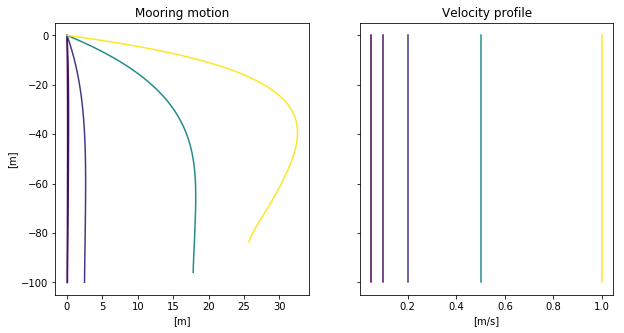

In [3]:

# with
cmap = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=u1min, vmax=u1max)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)

f, axarr = plt.subplots(1,2, sharey=True, figsize=(10,5))
#
ax = axarr[0]
for d in D:
    colorVal = scalarMap.to_rgba(d['u1'])
    ax.plot(d['x'],d['z'],color=colorVal)
ax.set_title('Mooring motion')
ax.set_xlabel('[m]')
ax.set_ylabel('[m]')
#
ax = axarr[1]
for d in D:
    colorVal = scalarMap.to_rgba(d['u1'])
    ax.plot([d['u0'],d['u1']],[0., -100.],color=colorVal)
ax.set_title('Velocity profile')
ax.set_xlabel('[m/s]')
#ax.set_ylabel('[m]')

    